In [360]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [361]:
data = pd.read_csv('tree_data_new.csv')



In [362]:
print(data.columns)

Index(['width_leaf', 'length_leaf', 'area', 'length_width_ratio',
       'num_leaves_rachis', 'length_rachis', 'label'],
      dtype='object')


In [363]:
print(data.head())

   width_leaf  length_leaf  area  length_width_ratio  num_leaves_rachis  \
0         2.0          6.4   245            3.200000                 18   
1         2.0          6.4   251            3.200000                 18   
2         2.1          6.0   195            2.857143                 18   
3         2.0          5.6   182            2.800000                 16   
4         1.8          4.8   160            2.666667                 16   

   length_rachis         label  
0           18.2  Senna siamea  
1           14.1  Senna siamea  
2           20.2  Senna siamea  
3           19.2  Senna siamea  
4           18.3  Senna siamea  


In [364]:
label_encoder = LabelEncoder()

# Fit and transform the correct 'Species' column
data['label'] = label_encoder.fit_transform(data['label'])

# Print the first few rows to verify the transformation
print(data.head())


   width_leaf  length_leaf  area  length_width_ratio  num_leaves_rachis  \
0         2.0          6.4   245            3.200000                 18   
1         2.0          6.4   251            3.200000                 18   
2         2.1          6.0   195            2.857143                 18   
3         2.0          5.6   182            2.800000                 16   
4         1.8          4.8   160            2.666667                 16   

   length_rachis  label  
0           18.2      2  
1           14.1      2  
2           20.2      2  
3           19.2      2  
4           18.3      2  


In [365]:
# Strip spaces from column names
data.columns = data.columns.str.strip()


In [366]:
# Check for missing values
print(data['label'].isnull().sum())


0


In [367]:
X = data[['width_leaf', 'length_leaf', 'area', 'length_width_ratio',
       'num_leaves_rachis', 'length_rachis']].values
y = data['label'].values

In [368]:
#split the data into trining and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

In [369]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [370]:
#define the model
#assuming we have 3 species
model = Sequential()
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [371]:
# compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [378]:
#train the model
# Define early stopping
history = model.fit(x_train, y_train, epochs=50, batch_size=16, validation_split=0.1)


Epoch 1/50
5/5 [==============================] - 0s 16ms/step - loss: 0.1567 - accuracy: 0.9333 - val_loss: 0.1239 - val_accuracy: 0.8889
Epoch 2/50
5/5 [==============================] - 0s 8ms/step - loss: 0.1634 - accuracy: 0.9200 - val_loss: 0.0951 - val_accuracy: 1.0000
Epoch 3/50
5/5 [==============================] - 0s 9ms/step - loss: 0.1307 - accuracy: 0.9467 - val_loss: 0.1265 - val_accuracy: 0.8889
Epoch 4/50
5/5 [==============================] - 0s 10ms/step - loss: 0.1542 - accuracy: 0.9467 - val_loss: 0.1012 - val_accuracy: 0.8889
Epoch 5/50
5/5 [==============================] - 0s 10ms/step - loss: 0.1375 - accuracy: 0.9467 - val_loss: 0.0984 - val_accuracy: 1.0000
Epoch 6/50
5/5 [==============================] - 0s 7ms/step - loss: 0.1519 - accuracy: 0.9467 - val_loss: 0.1055 - val_accuracy: 0.8889
Epoch 7/50
5/5 [==============================] - 0s 8ms/step - loss: 0.1370 - accuracy: 0.9467 - val_loss: 0.1288 - val_accuracy: 0.8889
Epoch 8/50
5/5 [===============

In [379]:
 # Evaluate the model
loss, accuracy = model.evaluate(x_train, y_train)
print(f'Test Accuracy: {accuracy * 100:.1f}%')

3/3 [==============================] - 0s 2ms/step - loss: 0.0970 - accuracy: 0.9762
Test Accuracy: 97.6%


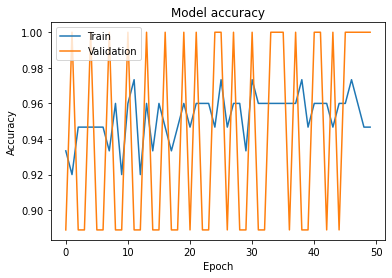

In [380]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

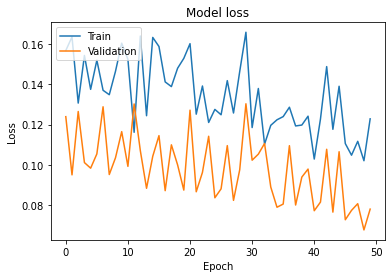

In [381]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [382]:
# Save the model
model.save('tree_classifier_model.h5')


C:\Users\Ramodika\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [383]:
#load the model
model = tf.keras.models.load_model('tree_classifier_model.h5')

In [384]:
#example prediction
new_data = np.array([[1.1,3.4,70,3.090909,26,20.2]]) #example input
prediction = model.predict(new_data)
predicted_species = label_encoder.inverse_transform([np.argmax(prediction)])
print(f'Predicted Species: {predicted_species[0]}')

1/1 [==============================] - 0s 41ms/step
Predicted Species: Cassia roxburghii


In [385]:
#example prediction
new_data = np.array([[2,5.4,231,3.2,18,18.2]]) #example input
prediction = model.predict(new_data)
predicted_species = label_encoder.inverse_transform([np.argmax(prediction)])
print(f'Predicted Species: {predicted_species[0]}')

1/1 [==============================] - 0s 18ms/step
Predicted Species: Senna siamea
